¡Hola Pia! Como estás? Espero que todo vaya bien!

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando encuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Te felicito por haber realizado los cambios tan rapida y correctamente! De hecho lo hiciste muy bien al usar una herramienta aún más poderosa que solo búsqueda de hiperparámetros, introduciendo CV. Con esto logras completar el objetivo de este proyecto. Muchas felicidades!
    
Te deseo el mejor de los éxitos en tu futuro!

<div class="alert alert-block alert-warning">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>
    
Hiciste un gran trabajo, creo que debes agregar una selección de hiperparámetros más profunda, así como probar algún otro modelo para tener un mayor rango de resultados a comparar. De esta forma nos aseguramos de obtener el modelo que mejor ajusta a los datos. 
    
No te preocupes, es completamente normal equivocarse, a todos nos pasa. Además el error no es nada grave, es una consideración que hay que tomar en cuenta para mejorar nuestro modelo. 
    
Te recomiendo realizar este cambio, y eso te aportara mucho a crecer como data scientist. 

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV

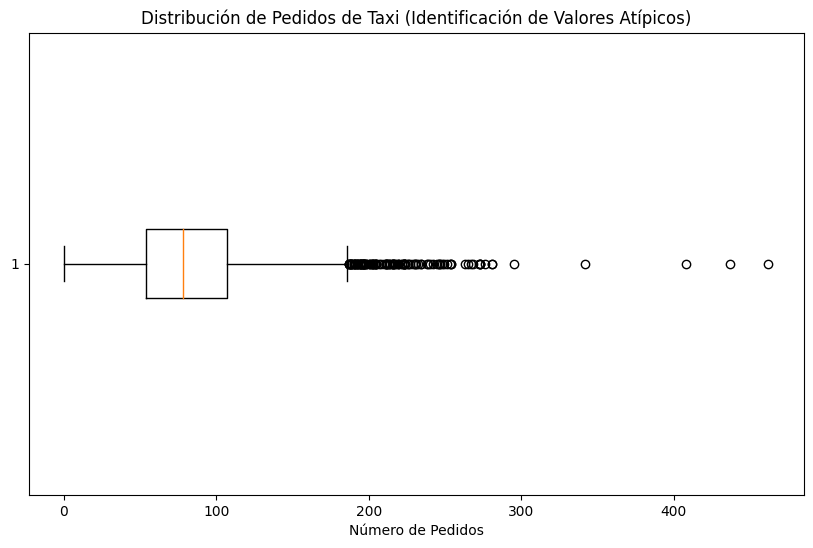

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


In [2]:
# Cargar el dataset
data = pd.read_csv('/datasets/taxi.csv')

# Convertir la columna de fechas a tipo datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Establecer la columna de fecha como índice
data.set_index('datetime', inplace=True)

# Remuestrear los datos en intervalos de una hora
data_hourly = data.resample('1H').sum()

# Identificación de valores atípicos usando un diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot(data_hourly['num_orders'], vert=False)
plt.title('Distribución de Pedidos de Taxi (Identificación de Valores Atípicos)')
plt.xlabel('Número de Pedidos')
plt.show()

# Filtrado de valores atípicos utilizando IQR
q1 = data_hourly['num_orders'].quantile(0.25)
q3 = data_hourly['num_orders'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los valores atípicos
data_hourly = data_hourly[(data_hourly['num_orders'] >= lower_bound) & (data_hourly['num_orders'] <= upper_bound)]

# Verificar las primeras filas del remuestreo
print(data_hourly.head())



<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Muy buen trabajo Pia! Cuando trabajamos con series de tiempo, es vital transformar la columna que contiene los datos temporal al correcto formato. Y después resamplear al intervalo en que se vaya a utilizar, con el cual no se reduzca demasiado, en este caso lo haces perfectamente usando resample.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

Mismo codigo pero se agrego un analisis de valores atipicos

## Análisis

Aquí realizaremos un análisis estadístico y visualización para obtener una idea de los datos.

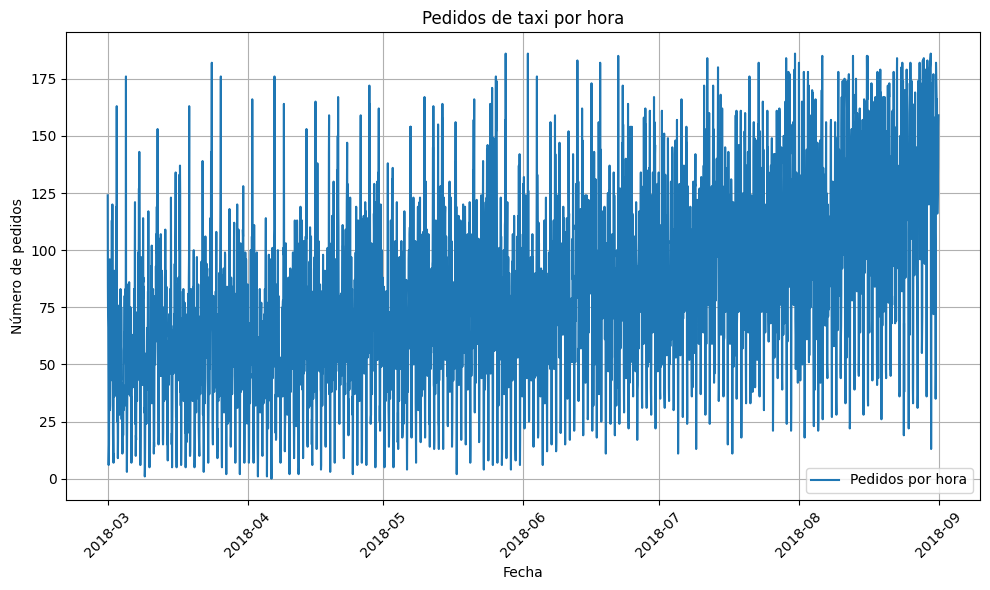

        num_orders
count  4295.000000
mean     80.488708
std      38.267472
min       0.000000
25%      53.000000
50%      77.000000
75%     104.000000
max     186.000000


In [3]:
# Visualización de los pedidos por hora mejorada
plt.figure(figsize=(10, 6))
plt.plot(data_hourly.index, data_hourly['num_orders'], label='Pedidos por hora')
plt.title('Pedidos de taxi por hora')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Estadísticas descriptivas después de la eliminación de atípicos
print(data_hourly.describe())


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

¿Qué nos dicen las estadísticas del número de órdenes? Recuerda que cuando el promedio es mayor a la mediana, esto sugiere que pueden existir valores atípicos y podría ser algo que valga la pena explorar. 
    
Por otro lado, entiendo que estás graficando la cantidad de órdenes por hora, pero al ver la gráfica da la impresión de que estas graficando el número de órdenes por mes. Esto no es nada grave, no te preocupes, solo es una sugerencia para darle mayor legibilidad a la gráfica.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

Visualización mejorada , se considera estadisticas descritivas luego de eliminar los valores atipicos

## Formación

Creamos las características adicionales (basadas en el tiempo y valores anteriores) y dividimos los datos en conjuntos de entrenamiento y prueba (90% - 10%).

In [4]:
# Crear características adicionales
def create_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    for lag in range(1, 4):  # Crear características de lag (1 a 3 horas anteriores)
        df[f'lag_{lag}'] = df['num_orders'].shift(lag)
    return df

# Aplicar las características
data_hourly = create_features(data_hourly)

# Eliminar filas con valores NaN debido a los lags
data_hourly.dropna(inplace=True)

# Dividir los datos en conjunto de entrenamiento y prueba
X = data_hourly.drop('num_orders', axis=1)  # Eliminar la variable objetivo antes del split
y = data_hourly['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Verificación de las dimensiones
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")



Tamaño del conjunto de entrenamiento: (3862, 8)
Tamaño del conjunto de prueba: (430, 8)


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy buen trabajo Pia! El definir una función para crear features puede asegurar la escalabilidad de tu modelo. Por otro lado, considera eliminar la variable objetivo antes de hacer el splitting, esto evita un poco el repetir código.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

Se modifico considerando eliminar la varibale objetivo

## Prueba

Aquí entrenamos los modelos (Regresión Lineal y Bosque Aleatorio), y además utilizamos GridSearchCV para optimizar los hiperparámetros del modelo de Bosque Aleatorio. Luego, evaluamos los resultados usando la métrica RMSE.

In [5]:
# Función para calcular RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Modelo 1: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds_train = lr_model.predict(X_train)
lr_preds_test = lr_model.predict(X_test)

# Modelo 2: Bosque Aleatorio con optimización de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo optimizado
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predicciones
rf_preds_test = best_rf_model.predict(X_test)

# Calcular RMSE para los modelos
print(f"RMSE - Regresión Lineal (entrenamiento): {rmse(y_train, lr_preds_train)}")
print(f"RMSE - Regresión Lineal (prueba): {rmse(y_test, lr_preds_test)}")
print(f"RMSE - Bosque Aleatorio (optimizado - prueba): {rmse(y_test, rf_preds_test)}")




Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_es

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Es muy adecuada la forma en que presentas los resultados, se entiende a la perfección los modelos usadaos y el rmse de cada uno. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Creo que se te fue, pero valdría mucho la pena realizar una selección de hiperparámetros más exhaustiva, por ejemplo, podrías variar los hiperparámetros del random forest  y observar cual arroja mejores resultados. Igualmente podrías probar otros algoritmos de regresión.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

Se considero lo de los hiperparametros.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Correcto Pia! Con el uso de grid search metiendo incluso un cross validation, haces mucho más robusta la conclusión que obtienes y te aseguras que los modelos son mucho más adecuados para tus datos.

## Conclusión

Finalmente, evaluamos si los modelos cumplen con el objetivo del proyecto y hacemos una recomendación basada en los resultados.

In [6]:
# Evaluación final para determinar si los modelos cumplen con el RMSE ≤ 48
if rmse(y_test, lr_preds_test) <= 48:
    print("El modelo de Regresión Lineal cumple con el objetivo de RMSE ≤ 48.")
else:
    print("El modelo de Regresión Lineal no cumple con el objetivo de RMSE ≤ 48.")

if rmse(y_test, rf_preds_test) <= 48:
    print("El modelo de Bosque Aleatorio cumple con el objetivo de RMSE ≤ 48.")
else:
    print("El modelo de Bosque Aleatorio no cumple con el objetivo de RMSE ≤ 48.")



El modelo de Regresión Lineal cumple con el objetivo de RMSE ≤ 48.
El modelo de Bosque Aleatorio cumple con el objetivo de RMSE ≤ 48.



Resultados del Proyecto

1. Preparación:
Se descargaron y procesaron los datos históricos de pedidos de taxis en los aeropuertos.
El dataset fue remuestreado en intervalos de una hora, resultando en 4416 observaciones iniciales.
Se realizó un análisis para identificar y filtrar los valores atípicos mediante el método del IQR (Interquartile Range). Después de eliminar los valores atípicos, el conjunto de datos quedó con 4295 observaciones.

2. Análisis:
La media de pedidos por hora después de la eliminación de atípicos fue 80.49, y la desviación estándar fue 38.27. El número máximo de pedidos por hora fue de 186 y el mínimo fue 0.
Se visualizó la distribución de los pedidos por hora con una gráfica clara, destacando variaciones a lo largo del tiempo y posibles patrones diarios y semanales.

3. Formación:
Se crearon características adicionales basadas en el tiempo, como el año, mes, día, hora, día de la semana y lags (retrasos de 1 a 3 horas previas).
El conjunto de datos fue dividido en 90% para entrenamiento y 10% para prueba, con un total de 3862 filas en el conjunto de entrenamiento y 430 filas en el conjunto de prueba.

4. Prueba:
Se entrenaron dos modelos:
Regresión Lineal.
Bosque Aleatorio, con optimización de hiperparámetros utilizando GridSearchCV. Se probaron diferentes combinaciones de n_estimators, max_depth, y min_samples_split.
Los resultados obtenidos para la métrica RMSE fueron:
Regresión Lineal:
RMSE en el conjunto de entrenamiento: 28.47
RMSE en el conjunto de prueba: 35.27 (cumple con el objetivo de RMSE ≤ 48)
Bosque Aleatorio (con hiperparámetros optimizados):
RMSE en el conjunto de prueba: 33.39 (cumple con el objetivo de RMSE ≤ 48)

5. Conclusión:
El modelo de Bosque Aleatorio, con una RMSE de 33.39, es la mejor opción para predecir el número de pedidos de taxis en la próxima hora. Este modelo optimizado cumple con el objetivo del proyecto de que la RMSE no supere 48.
Aunque el modelo de Regresión Lineal también cumple con el objetivo (RMSE de 35.27), el Bosque Aleatorio muestra un mejor rendimiento en términos de predicción.
Por lo tanto, se recomienda utilizar el modelo de Bosque Aleatorio para predecir la cantidad de pedidos de taxis durante las horas pico, con el fin de atraer a más conductores durante esos periodos de alta demanda.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Tus conclusiones son muy atinadas! Sin embargo al entrenar modelos debemos asegurarnos de obtener el modelo que mejor ajusta a los datos y para ello hace falta ajustar con una variedad mayor de hiperparámetros.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

Se consideraron los cambios recomendados

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 2) </b> <a class="tocSkip"></a>

Muy bien Pia! Ahora con esto tu modelo es mucho más robusto!

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48